In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.1 MB/s eta 0:00:00


In [5]:
!yolo task=detect mode=train model=yolov8n.pt \
data="/content/drive/MyDrive/Pedestrian Detection Dataset/data.yaml" \
epochs=50 imgsz=640 \
project="/content/drive/MyDrive/Pedestrian Detection Dataset" \
name="training_results"


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Pedestrian Detection Dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=training_results, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, ov

In [6]:
!yolo task=detect mode=val \
model="/content/drive/MyDrive/Pedestrian Detection Dataset/training_results/weights/best.pt" \
data="/content/drive/MyDrive/Pedestrian Detection Dataset/data.yaml" \
project="/content/drive/MyDrive/Pedestrian Detection Dataset" \
name="validation_results"


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 49.3±11.8 MB/s, size: 176.3 KB)
val: Scanning /content/drive/MyDrive/Pedestrian Detection Dataset/valid/labels.cache... 500 images, 97 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 500/500 83.9Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 32/32 3.5it/s 9.3s
                   all        500       2594      0.757      0.447      0.529      0.306
Speed: 1.3ms preprocess, 3.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/drive/MyDrive/Pedestrian Detection Dataset/validation_results
💡 Learn more at https://docs.ultralytics.com/modes/val


In [8]:
!yolo task=detect mode=predict \
model="/content/drive/MyDrive/Pedestrian Detection Dataset/training_results/weights/best.pt" \
source="/content/drive/MyDrive/Pedestrian Detection Dataset/test/images" \
project="/content/drive/MyDrive/Pedestrian Detection Dataset" \
name="test_predictions"


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/500 /content/drive/MyDrive/Pedestrian Detection Dataset/test/images/bremen_000000_000019_leftImg8bit_png.rf.8357924d6e69a12de31aa20ab22b525f.jpg: 320x640 (no detections), 43.4ms
image 2/500 /content/drive/MyDrive/Pedestrian Detection Dataset/test/images/bremen_000001_000019_leftImg8bit_png.rf.b1a384f3257f52866e225cf87bac050a.jpg: 320x640 (no detections), 6.2ms
image 3/500 /content/drive/MyDrive/Pedestrian Detection Dataset/test/images/bremen_000002_000019_leftImg8bit_png.rf.694b8472917973edd193e03d9d388e63.jpg: 320x640 1 Person, 6.0ms
image 4/500 /content/drive/MyDrive/Pedestrian Detection Dataset/test/images/bremen_000003_000019_leftImg8bit_png.rf.2cc14466c5977bcf7e5465807f071677.jpg: 320x640 1 Person, 5.9ms
image 5/500 /content/drive/MyDrive/Pedestrian Detection Dataset/test/images/bremen_000004_000019_leftImg8bit_p

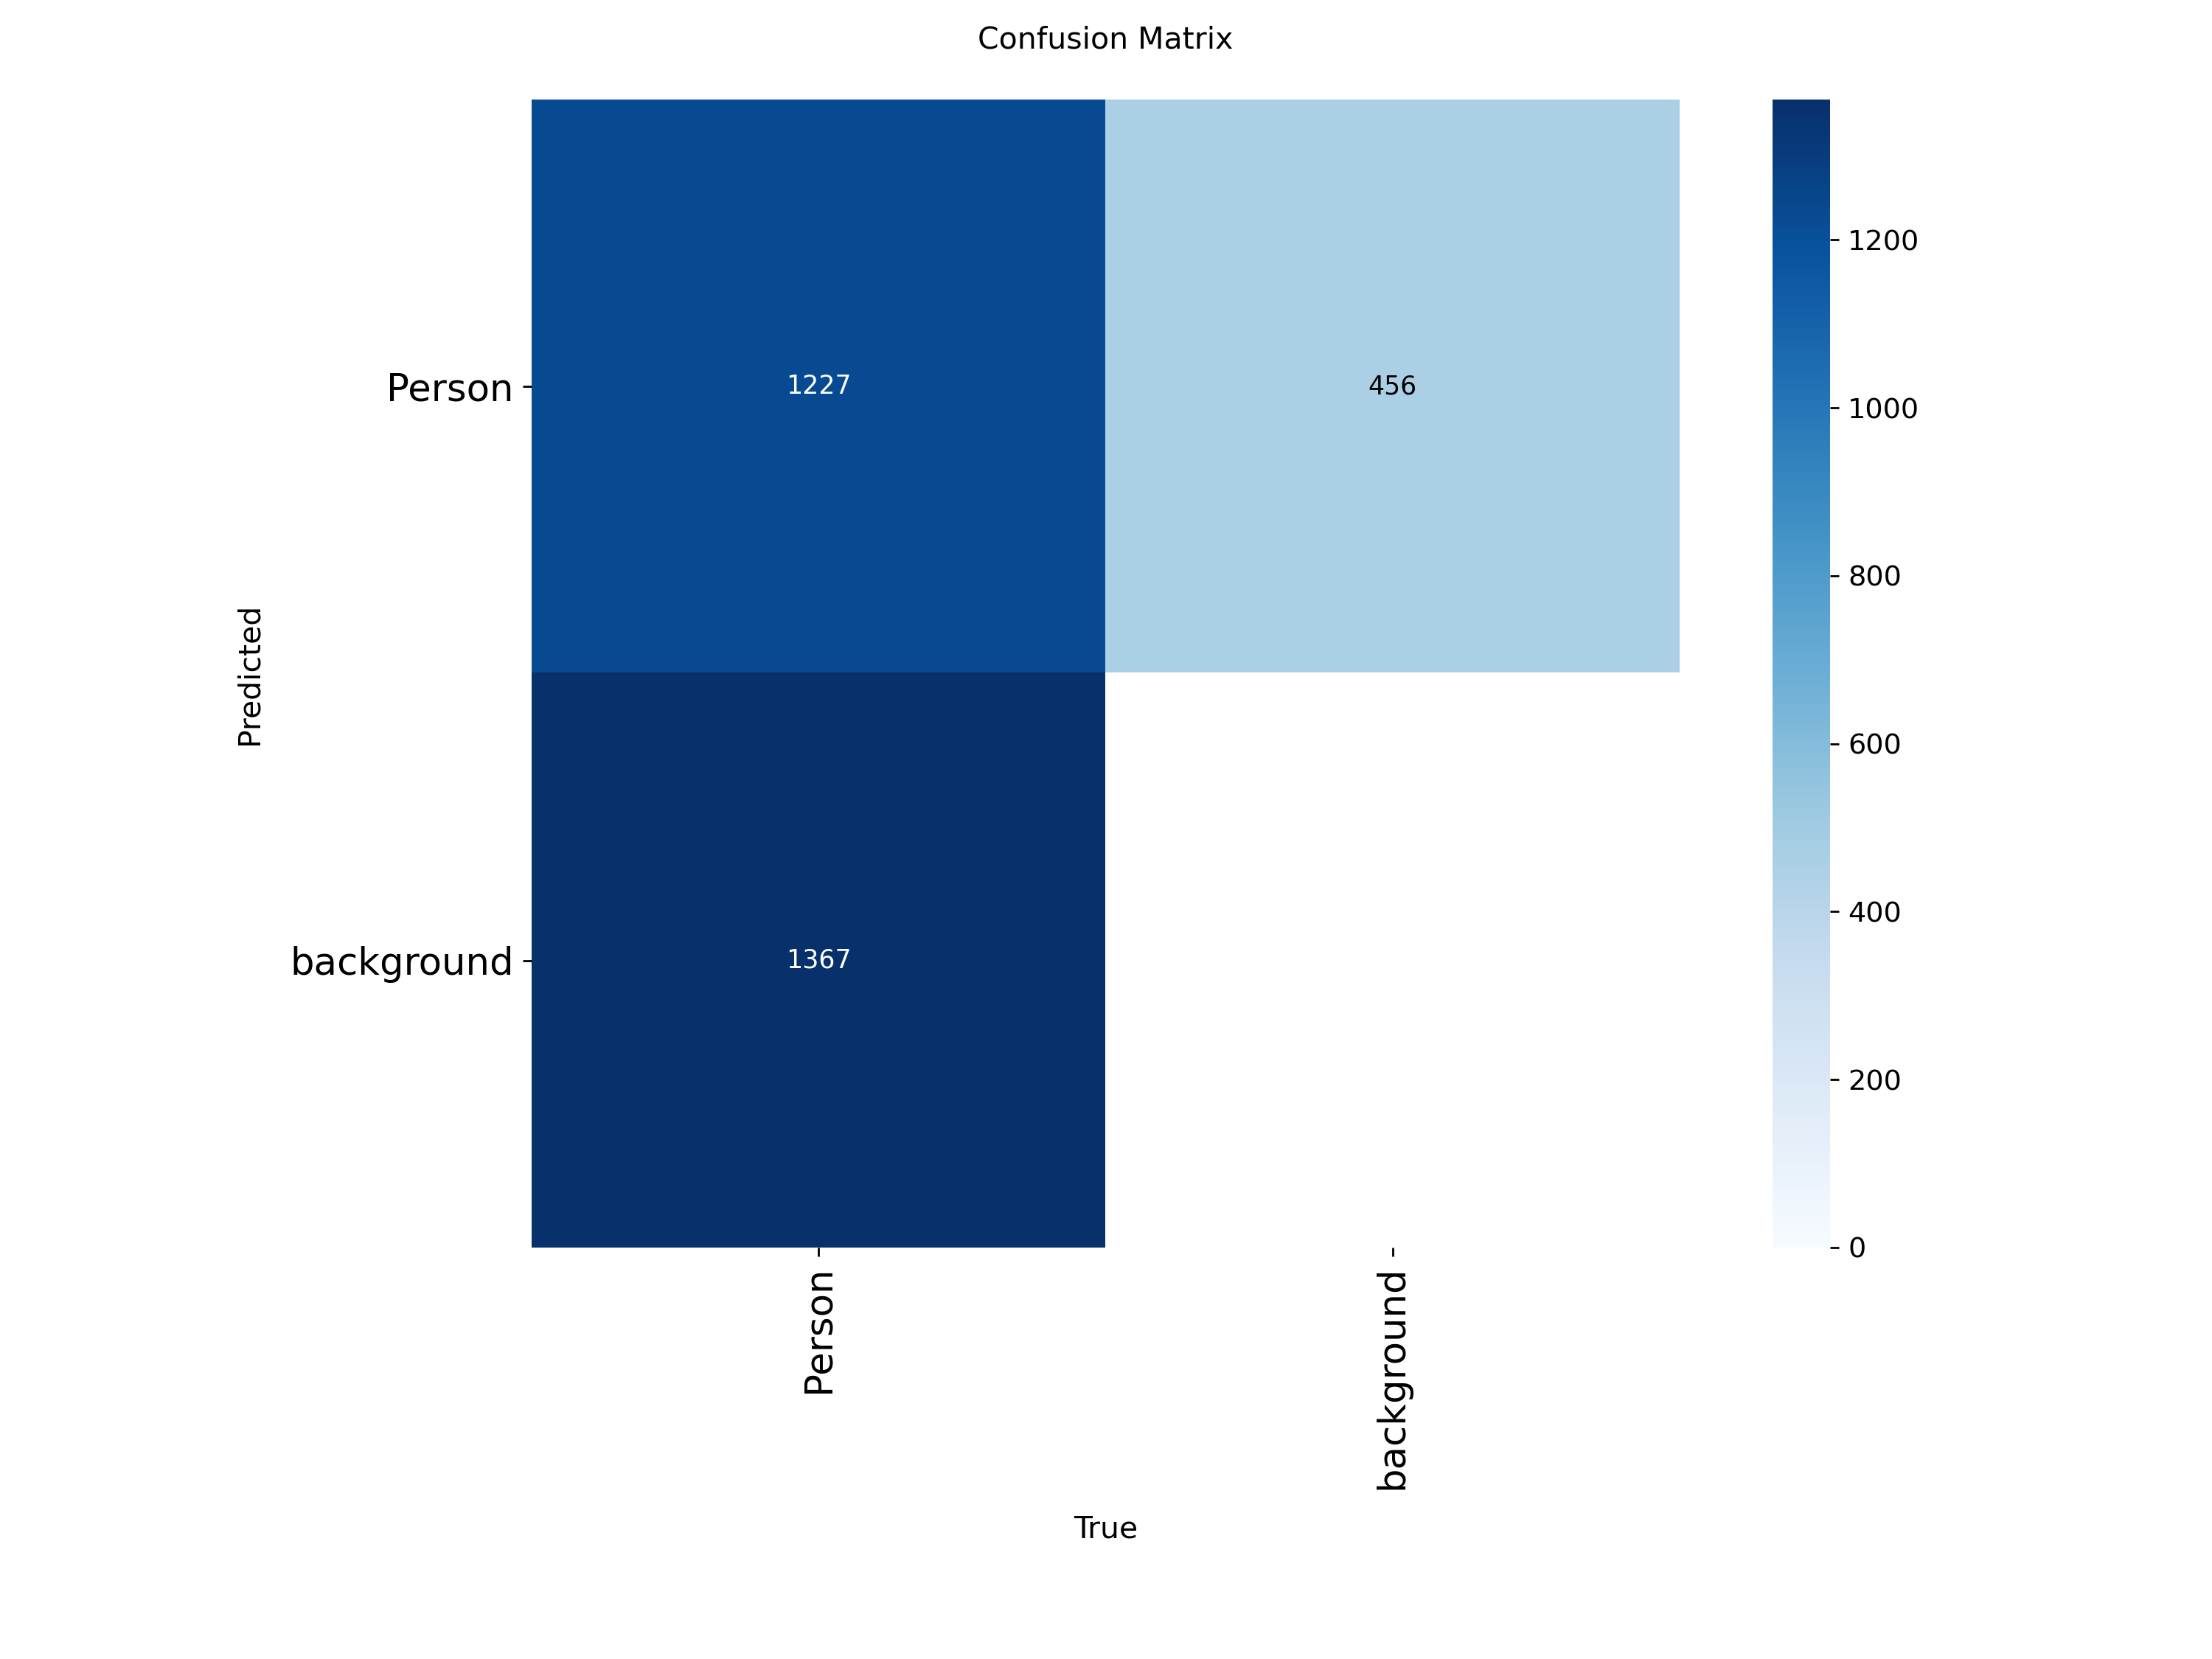

In [9]:
from IPython.display import Image, display

display(Image('/content/drive/MyDrive/Pedestrian Detection Dataset/validation_results/confusion_matrix.png'))


In [14]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/Pedestrian Detection Dataset/training_results/weights/best.pt")
results = model.val(data="/content/drive/MyDrive/Pedestrian Detection Dataset/data.yaml")

print("Precision:", results.box.p[0])
print("Recall:", results.box.r[0])
print("mAP50:", results.box.map50)
print("mAP50-95:", results.box.map)


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 67.6±9.1 MB/s, size: 160.5 KB)
val: Scanning /content/drive/MyDrive/Pedestrian Detection Dataset/valid/labels.cache... 500 images, 97 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 500/500 69.9Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 32/32 3.2it/s 9.9s
                   all        500       2594      0.757      0.447      0.529      0.306
Speed: 1.4ms preprocess, 3.4ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to /content/runs/detect/val3
Precision: 0.7566603381604947
Recall: 0.4471229514479267
mAP50: 0.5294736513477863
mAP50-95: 0.3058363915886112
